# HW Addendum

## Imports

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
sns.set(font_scale = 1.2, rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings('ignore')

## 1 Data and Constructing Returns

#### Data:

In [14]:
df = yf.download("SPY GOLD TSLA")['Adj Close'].dropna()

df.head()

[*********************100%***********************]  3 of 3 completed


,GOLD,SPY,TSLA
Date,,,
2010-06-29,38.443848,83.951881,4.778
2010-06-30,38.794102,83.154335,4.766
2010-07-01,36.820663,82.783760,4.392
2010-07-02,36.940281,82.332611,3.840
2010-07-06,36.718143,82.872383,3.222


#### Returns:

In [15]:
data = df.pct_change().dropna()

data.head()

,GOLD,SPY,TSLA
Date,,,
2010-06-30,0.009111,-0.009500,-0.002512
2010-07-01,-0.050870,-0.004456,-0.078472
2010-07-02,0.003249,-0.005450,-0.125683
2010-07-06,-0.006013,0.006556,-0.160938
2010-07-07,0.020940,0.031496,-0.019243


## 2 Graphing the Distributions

## Data and Construction Returns

#### 1. Graph both return distributions

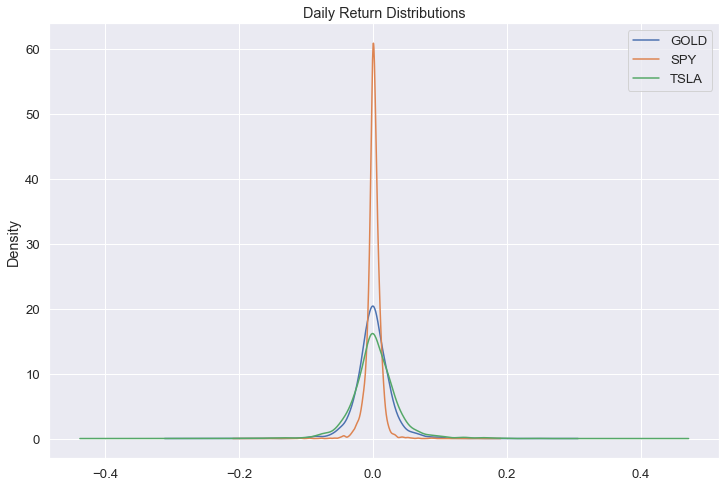

In [77]:
data.plot.kde()

plt.legend()
plt.title('Daily Return Distributions')
plt.show()

#### 2. From looking at the distributions, which security would we expect to be most volatile? Why?
Tesla's returns are much more spread out and cluster less, and the tails appear longer, so we could expect Tesla to have higher volatility. Large percentage movements in price are more common. 

In [24]:
(data.var()**.5).to_frame('Volatility (Std Dev)')

,Volatility (Std Dev)
GOLD,0.025397
SPY,0.010616
TSLA,0.035420


## 3 Normality Tests and Analysis

#### 1. For each time series of returns graph a QQ plot and interpret it

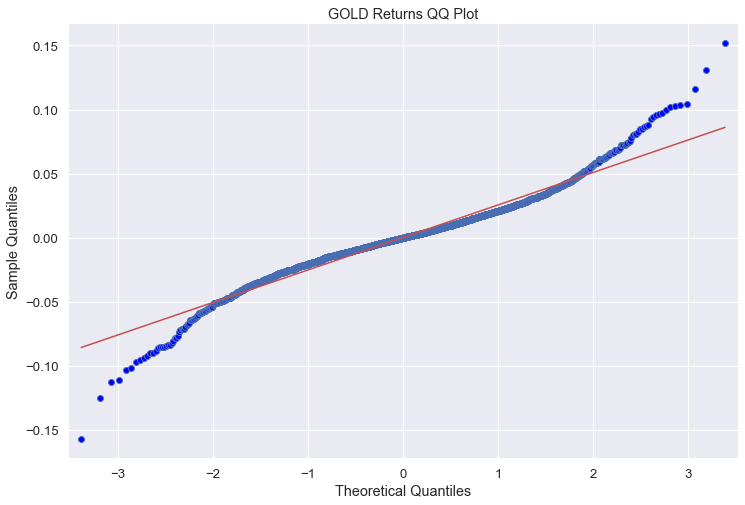

In [68]:
qqplot(data['GOLD'], line = 's')
plt.title('GOLD Returns QQ Plot')
pyplot.show()

Despite the QQ Plot for GOLD deviating from the Gaussian expectation less than SPY and TSLA, it is still quite clear that the tails of the distribution differ substantially (they are thicker) from what might be expected for a normal distribution.

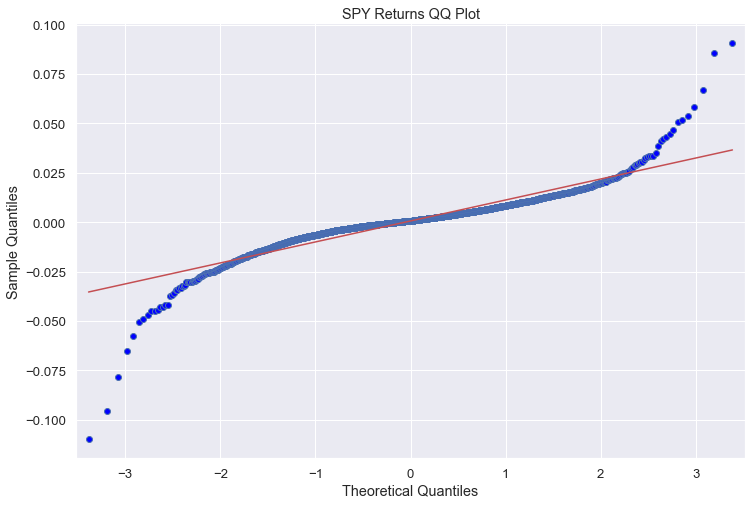

In [66]:
qqplot(data['SPY'], line = 's')
plt.title('SPY Returns QQ Plot')
pyplot.show()

For SPY the tails differ enormously from the normal distribution generated, as they appear to be much thicker. 

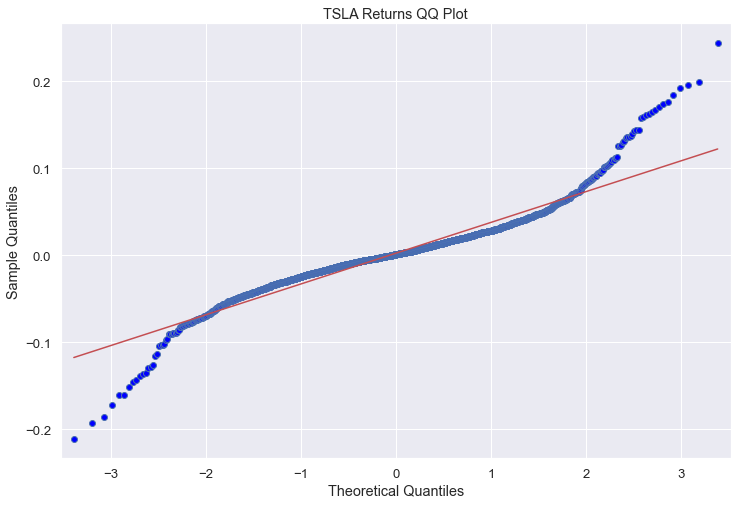

In [67]:
qqplot(data['TSLA'], line = 's')
plt.title('TSLA Returns QQ Plot')
pyplot.show()

TSLA also differs from the normal distribution sample provided, as the tails differ greatly. Once again they are much thicker.

#### 2. For each time series of returns run the Shapiro-Wilk test and state state whether you think the distribution is normal

In [78]:
securities = ['GOLD', 'SPY', 'TSLA']

SW_test = pd.DataFrame(index = securities, columns = ['Test Stat', 'p-value', 'Normal?'])

for security in securities:
    
    test_object = stats.shapiro(data[security])
    
    if test_object.pvalue < 0.05:
        norm = 'Reject'
    else:
        norm = 'Fail to Reject'
    
    SW_test.loc[security] = [round(test_object.statistic,4), round(test_object.pvalue,4), norm]
    
SW_test

,Test Stat,p-value,Normal?
GOLD,0.9596,0.0,Reject
SPY,0.8716,0.0,Reject
TSLA,0.9218,0.0,Reject


All p-values are very small, and we can easily reject the null hypothesis that any of these securities' return distributions are normal at 95% confidence (or higher). 

## 4 Distribution Analysis

#### 1. Find and interpret skewness for each security

In [25]:
data.skew().to_frame('Skew')

,Skew
GOLD,0.050236
SPY,-0.641522
TSLA,0.419047


- GOLD is not very skewed. The distribution is close to symmetrical, and we can expect measure of central tendency such as the mean, median, and mode to have smaller differences than more skewed data. We expect a similar frequency of returns on either side of the distribution, although we do expect a slightly longer right tail, and values to be slightly more concentrated on the left side of the distribution.
- SPY is quite negatively skewed, meaning that values are concentrated on the right side of the distribution, but the left tail is longer. We expect the median to be larger than the mean. 
- TSLA is quite positively skewed, meaning values are concentrated on the left side of the distribution, but the right tail is longer. While return distributions tend to be negatively skewed, this might make sense for TSLA as it has seen notable positive outlier moves. We can expect a mean higher than its median. 

#### 2. Take the skewness of SPY returns. How might this number explain the old Wall St. expression "The bull walks up the stairs, the bear jumps out the window”?
As mentioned previously, SPY is quite negatively skewed, meaning that values are concentrated on the right side of the distribution, but the left tail is longer. In terms of SPY return context, this means we see more frequent but smaller magnitude positive returns, and less frequent but larger magnitude negative returns. In order words the market (SPY) drops faster than it rises. 

#### 3. Find and interpret kurtosis for each security

In [26]:
data.kurtosis().to_frame('Kurtosis')

,Kurtosis
GOLD,3.422243
SPY,14.416456
TSLA,5.949616


- All 3 securities' returns have leptokurtic distributions as they exhibit greater kurtosis than a normal distribution (kurtosis of 3).
- GOLD has the closest kurtosis value to a normal distribution, as it exhibits less extreme values in its tails relative to SPY and TSLA.
- SPY has very high kurtosis, which is caused by a combination of extreme values in the tails along with more values concentrated at the center of the distribution. Kurtosis is a measure that describes the shape of a distribution's tails in relation to its overall shape, which is why the value for SPY is so high.
- TSLA on the other hand has less extreme tails relative to its shape in comparison to SPY. Despite the lack of concentration at the center of the distribution however, the kurtosis value is quite high as the tails exhibit some extreme results. 

####  4.  Why might investors not like securities with return distributions that have large left tails?
A large left tail means higher probability of more negative values. Conceptually it means that investors are more likely to incur large losses, and is typically referred to as tail risk. 

## 5 Additional Review

#### 1. Regress GOLD on the market (SPY) and report $\alpha$, $\beta$, and $R^{2}$

In [40]:
y = data['GOLD']
x = sm.add_constant(data['SPY'])

reg1 = sm.OLS(y,x).fit()

df_5_2 = reg1.params.to_frame('Stats')
df_5_2.loc[r'$R^{2}$'] = reg1.rsquared

df_5_2

,Stats
const,-0.000136
SPY,0.343031
$R^{2}$,0.020561


#### 2. If SPY were to decrease by 5% tomorrow, what would happen to GOLD and how certain of the movement in GOLD would you be?

In [56]:
print('We expect GOLD to move ' + str(round((df_5_2.loc['const'] + df_5_2.loc['SPY'] * -0.05)[0]*100,3))+'%')

We expect GOLD to move -1.729%


We would not be certain at all of the movement in GOLD. $R^{2}$ is very low, these two securities have very little correlation.

#### 3. Regress GOLD on the market without an intercept and report $\beta$ and $R^{2}$

In [39]:
y_2 = data['GOLD']
x_2 = data['SPY']


reg2 = sm.OLS(y_2,x_2).fit()

df_5_3 = reg2.params.to_frame('Stats')
df_5_3.loc[r'$R^{2}$'] = reg2.rsquared

df_5_3

,Stats
SPY,0.342243
$R^{2}$,0.020544


#### 4. How does no longer including an intercept change the role of the regressor? In 5.1 what is the conceptual meaning of $\alpha$?
Not including an intercept causes the regressor to explain the level of the regressand, not just the variation of it. In 5.1, the intercept is the GOLD return not explained by SPY in the regression.